In [1]:
import numpy as np
import pandas as pd 

import ts_generator as generator
import visuals_tools as vis

try:
    import importlib
    importlib.reload(fe)
    
except NameError: 
    
    import feature_extraction as fe

{'amplitude': 2.0, 'frequency': 1.3666666666666667, 'phase': 4.1887902047863905, 'noise_level': 1.0}


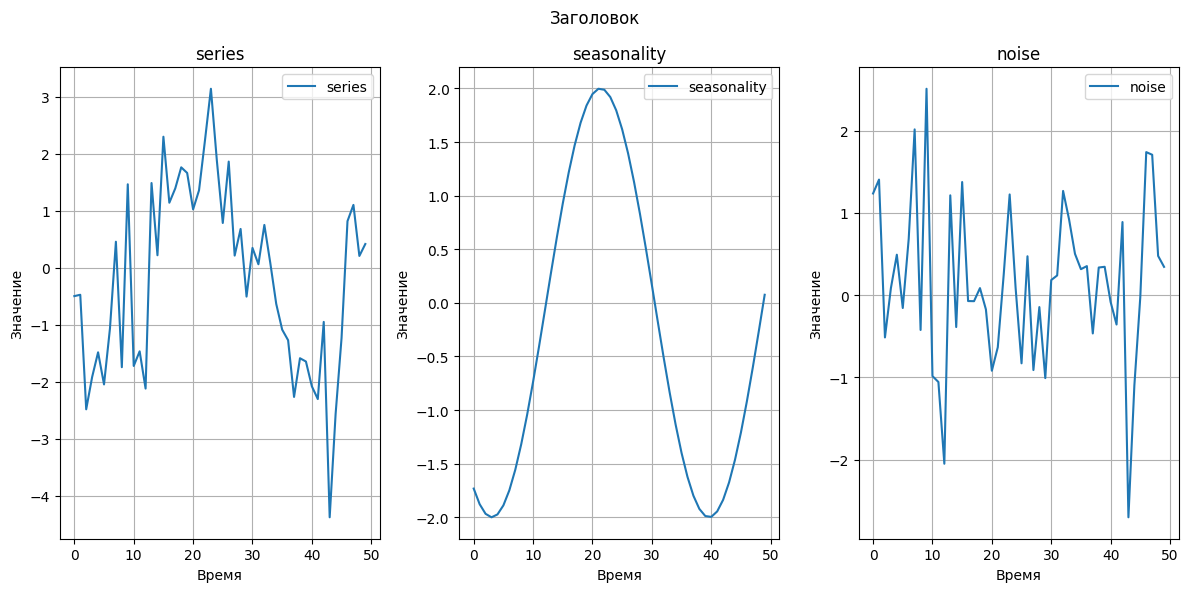

In [35]:
length = 50
only_array = False
# seed = 3 # 1 холм и 2 ямки
# seed = 4 # 1 яма
seed = 17 # 1 холм  

np.random.seed(seed)

params = generator.seasonal_series_params(k=1)
print(params)

series, seasonality, noise  = generator.seasonal_series(only_array = only_array, length=length, **params)
vis.multi_plot_each([series, seasonality, noise], ['series', 'seasonality', 'noise'])

In [40]:
fe.dft_components(series).flatten()

array([210.        ,   7.92297674,   2.25414879,  50.        ,
         9.42541172,   1.862718  , 110.        ,   9.78948711,
        -0.28055913,   0.        ,  10.5635405 ,  -3.14159265,
        40.        ,  11.41843607,   1.43479791,  30.        ,
        12.09428385,   0.42043591, 240.        ,  13.75923666,
        -1.85662231,  60.        ,  17.85612455,   1.20800461,
        20.        ,  20.11794239,   0.55022502,  10.        ,
        37.54988319,  -2.59187951])

In [ ]:

# np.random.seed(3) # один верхний 


# params['frequency'] = 10
# params['noise_level'] = 20

series, seasonality, noise  = generator.seasonal_series(only_array = only_array, length=length, **params)

print(params)
 
vis.multi_plot_each([series, seasonality, noise], ['series', 'seasonality', 'noise'])

# sign1, phase1, dom1 = fe.dft_amplitude(series), fe.dft_phase(series), fe.dft_dominant_freq(series)

# sign1, phase1, dom1

# feat1 = fe.extract_dwt_features(series, wavelet='db1', level=5, n_coeffs=10)
# feat1z

# feat1 = extract_features_from_time_series(series)

# feat1 = paa_features(series)

# Извлекаем признаки с информацией об уровне и типе
dwt_features_with_info = fe.extract_dwt_features_with_info(series, wavelet='db1', level=3, n_coeffs=10)
for coeff, level, coeff_type in dwt_features_with_info:
    print(f"Коэффициент: {coeff}, Уровень: {level}, Тип: {coeff_type}")

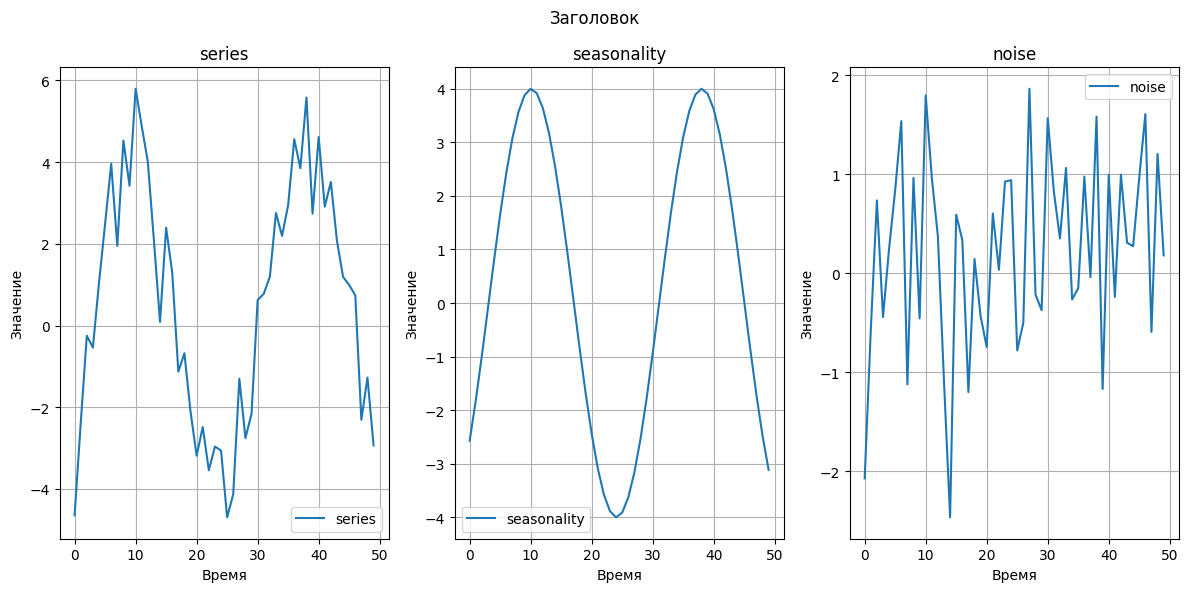

Коэффициент: 9.61426961063642, Уровень: 0, Тип: approximation
Коэффициент: 9.125856067996482, Уровень: 0, Тип: approximation
Коэффициент: -6.107801386107883, Уровень: 1, Тип: detail
Коэффициент: -5.950084094900802, Уровень: 0, Тип: approximation
Коэффициент: -5.903214197143308, Уровень: 0, Тип: approximation
Коэффициент: -5.230229933906873, Уровень: 0, Тип: approximation
Коэффициент: 4.851528586564717, Уровень: 0, Тип: approximation
Коэффициент: 4.415957844732217, Уровень: 1, Тип: detail
Коэффициент: 3.554628779658544, Уровень: 1, Тип: detail
Коэффициент: -3.4200025641143377, Уровень: 1, Тип: detail


e:\GitHubProjects\autolabeling_time_series_data\basic_312\Lib\site-packages\tslearn\utils\utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 1 1-dimensional timeseries
  warnings.warn(


In [224]:
length = 50
only_array = False

np.random.seed(27)

params = generator.seasonal_series_params(k=1)
series, seasonality, noise  = generator.seasonal_series(only_array = only_array, length=length, **params)


vis.multi_plot_each([series, seasonality, noise], ['series', 'seasonality', 'noise'])

# sign2, phase2, dom2 = fe.dft_significant(series), fe.dft_phase(series), fe.dft_dominant(series)
# sign2, phase2, dom2

# feat2 = fe.extract_dwt_features(series, wavelet='db1', level=5, n_coeffs=10)
# feat2

# feat2 = extract_features_from_time_series(series)
feat2 = paa_features(series)

# Извлекаем признаки с информацией об уровне и типе
dwt_features_with_info = fe.extract_dwt_features_with_info(series, wavelet='db1', level=3, n_coeffs=10)
for coeff, level, coeff_type in dwt_features_with_info:
    print(f"Коэффициент: {coeff}, Уровень: {level}, Тип: {coeff_type}")

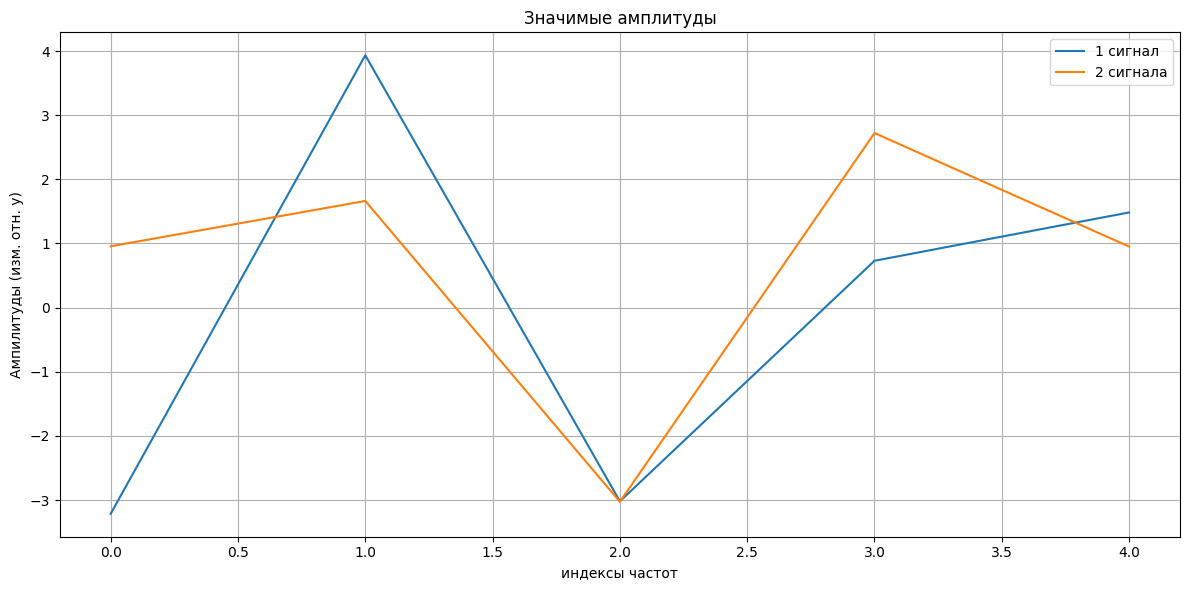

In [225]:
vis.multi_plot_one([feat1, feat2], ['1 сигнал', '2 сигнала'], plot_title='Значимые амплитуды', xlabel='индексы частот' , ylabel='Ампилитуды (изм. отн. y)')

# vis.multi_plot_one([dom1[1], dom2[1]], ['1 сигнал', '2 сигнала'], ylabel='Частоты (изм. отн. x)', xlabel='индексы частот', plot_title='Значения частот')

# vis.multi_plot_one([phase1, phase2], ['1 сигнал', '2 сигнала'], xlabel='индексы частот', ylabel='', plot_title='Характер сезонности')


In [82]:
feat1[0][2]

array([10., 40., 41.,  9., 39., 11.,  0., 45.,  5., 43.])